# Examples of Three Types of Modeling

We will categorize mathematical models as three types:

1. empirical models
2. dynamic models
3. Monte Carlo models

Let's demonstrate and play with each of these types of models.

In [1]:
# import packages
import random
import matplotlib.pyplot as plt
import numpy as np

## Emperical Model

An **emperical model** is a mathematical function obtained by finding the best-fit function that describes data. Here is an example of fitting a curve to recent annual global surface temperature.

The annual global surface temperature anomaly using land and sea data as a function of year is plotted below using data from [Berkeley Earth](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt). Temperature anomaly is the difference in the temperature measurement from a standard. In this case, the standard (reference) temperature is the Jan 1951-Dec 1980 average.

<img src="https://github.com/atitus/math-modeling/blob/master/unit-01/01-02-modeling/global-temp-anomaly.png?raw=true" width=800>

The last part of this graph since around 1960 is approximately quadratic of the form:

$$y = A x^2 + Bx + C$$

where $y$ is the variable on the vertical axis, $x$ is the variable on the horizontal axis, and $A$, $B$, and $C$ are the **curve fit parameters** that determine the shape of the function. 

However, in this case the variable plotted on the vertical axis is temperature anomaly, which we we call $T$, and the variable plotted on the horizontal axis is year, which we will call $t$. The best-fit function for years after 1960 is

$$T = \left(2.0223\times 10^{-4}\ \frac{^\circ\mathrm{C}}{y^2}\right)t^2 + \left(-0.78878\ \frac{^\circ\mathrm{C}}{y}\right)t + 769.06\ ^\circ\mathrm{C}$$

where $T$ is the global temperature anomaly in degrees Celsius, and $t$ is the year number.

### Example

This mathematical function is called the **emperical model**, and it can be used to calculate the temperature in any year from 1960 to 2019. Define the values of the fit parameters `A`, `B`, and `C` and the year `t`. Then calculate the temperature anomaly for that year using:

```python
T = A*t**2 + B*t + C
```

Note that in Python, the operator `**` is used to raise a quantity to a power. Let's calculate the temperature anomaly in 1980.

In [2]:
A = 2.0223e-4
B = -0.78878
C = 769.06

t = 1980

T = A*t**2 + B*t + C

print("The temperature in {:.0f} is {:.2f} degrees Celsius.".format(t, T))

The temperature in 1980 is 0.10 degrees Celsius.


I am going to define this in a Python function that you can call in order to print the temperature for any year.

In [3]:
def temp(t=1980):
    A = 2.0223e-4
    B = -0.78878
    C = 769.06

    T = A*t**2 + B*t + C

    return T

Now you can call this function with the year as the argument. Here is the temperature anomaly in 1980.

In [4]:
temp(1980)

0.09809199999995144

It is best to present your results in written form in a markdown cell. For instance, you can write: "Our emperical model predicts the annual global surface temperature anomaly in 1980 to be 0.098 degrees Celsius."

### Exercise 1

Compare your prediction to the measured temperature anomaly in 1980. What is the difference in the prediction and the measured temperature anomaly?

### Exercise 2

In the cell below, run the command `temp(1980)` again, but change the year to 1940.

What temperature anomaly does the model predict in 1940?

Compare the predicted temperature anomaly to the measured temperature anomaly. Why is the prediction so far off?

### Exercise 3

If this trend continues, what will be the temperature anomaly in 2050?

Is your prediction valid?

### Exercise 4

Under what circumstances can an emperical model be used?

What are the ethical considerations in using an emperical model to make predictions?

## Dynamic Model

A dynamic model is a set of mathematical equations based on theoretical relationships that describe how a system **evolves** over time. We will study dynamic models in biology, finance, and physics.

In this example, we calculate the trajectory of a baseball after the collision with a bat. First, run the cell below which defines the model. (It produces no output until it's called in a later cell.)

In [10]:
def baseball(v_mph=100, theta_deg=30):

    ## define constants
    m = 0.15 # kg
    g = 9.8 # N/kg
    dt = 0.01 # s

    rho=1.225 #kg/m^3
    Cd=0.3 #drag coeff
    R=0.074/2 #radius in m
    A = np.pi*R**2 #cross-sectional area of the ball

    # define variables and their initial values
    v = v_mph/2.23694 # m/s
    theta = theta_deg #deg
    vx = v*np.cos(theta*np.pi/180)
    vy = v*np.cos(np.pi/2-theta*np.pi/180)
    x = 0 # m
    y = 1 # m
    t = 0 # s

    # create empty lists for storing data
    tdata = []
    xdata = []
    ydata = []
    vxdata = []
    vydata = []

    # append initial values of t and P to our lists
    tdata.append(t)
    xdata.append(x)
    ydata.append(y)
    vydata.append(vy)
    vxdata.append(vx)

    # loop
    while y>=0:
        Fnet_x = - 1/2*rho*A*Cd*v*vx
        Fnet_y = -m*g - 1/2*rho*A*Cd*v*vy
        vx = vx + (Fnet_x/m)*dt
        vy = vy + (Fnet_y/m)*dt
        v = np.sqrt(vx**2 + vy**2)
        x = x + vx*dt
        y = y + vy*dt
        t = t + dt

        vxdata.append(vx)
        vydata.append(vy)
        xdata.append(x)
        ydata.append(y)
        tdata.append(t)

    # plot the calculated data
    plt.figure()
    plt.title('Path of a baseball')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.grid(which='both', axis='both')
    plt.plot(xdata,ydata,'b-')
    plt.show()
    
    # print the final x
    print("At t = {:.3f} s, x = {:.1f} m = {:.1f} ft.".format(t, x, x*3.2808))


The two variables we will vary in our model are:

- the launch speed of the baseball in miles per hour (mph) (i.e. the baseball's speed just after it leaves the bat)
- the launch angle of the baseball in degrees (i.e. the angle at which it leaves the bat)

The model produces a trajectory (y position vs. x position) showing the path of the ball. The time and the horizontal distance at which the ball lands is shown. The ball is assumed to leave the bat at a height of 1 m from the ground. Our model includes the forces of gravity and air resistance. It does **not** include the effect of air due to the spin of the ball. In other words, in our model, a baseball hit with back spin and a baseball hit with top spin would travel the same distance, if all other variables are the same.

To run the model and view the output, use the function:

```python
baseball(speed, angle)
```

where `speed` represents the launch speed of the ball in mph and `angle` represents the launch angle in degrees. For example, `baseball(100,45)` will show you the trajectory for a baseball launched with a speed of 100 mph at an of angle 45 degrees. Run the cell below to see the result.

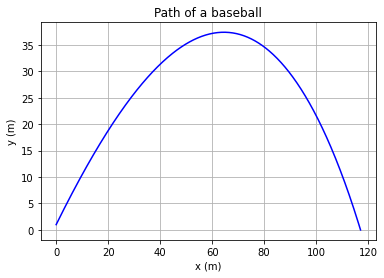

At t = 5.470 s, x = 117.1 m = 384.1 ft.


In [11]:
baseball(100,45)

### Exercise 1

Copy the code above and paste it into the cell below. Change the angle to 40 degrees, but leave the launch speed at 100 mph. Does the baseball travel farther or less far?

### Exercise 2

Copy the code above and paste it into the cell below. Using a launch speed of 100 mph, find the angle at which the baseball travels the farthest. (In mathematics, this is called an *optimization* problem.)

### Exercise 3

Go to [this web site](http://m.mlb.com/statcast/leaderboard#hr-distance) that lists all home runs hit in MLB in 2019. Select one of the home runs, and write below (in this cell), its launch speed, its launch angle, and its distance.

### Exercise 4

Use our model of a baseball to predict the distance of the home run, given the same launch speed and launch angle from the previous exercise. Your code should be in the cell below. Compare your predicted distance to the actual distance. 

How far off is your prediction?

In general, how does one improve a model so the prediction is closer to the value measured?

## Monte Carlo Model

A Monte Carlo model is a description of a system based on a set of rules and random processes. It is named after the casinos in Monte Carlo.

In this example inspired by an article in [Towards AI on medium.com](https://medium.com/towards-artificial-intelligence/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8#6185), we will explore the general question: "How do casinos earn money?" In this case, we have a simplified casino game where a playeer selects a chip from a bag of chips. The rules are:

- There are chips containing numbers ranging from 1–100 in a bag.
- Players can bet on even or odd chips. If they win, they double the money waged. If they lose, they lose the money waged.
- In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number. Therefore:
  - if we bet on even numbers and we get 10 then we lose.
  - if we bet on odd numbers and we get 11 then we lose.

As a result of these rules, there are 100 possible outcomes when you select a chip from the bag. In 49 of the possible outcomes, you will win. In 51 of the possible outcomes you will lose. Therefore, the house (i.e. casino) always has a higher probability of winning than you do.

The probability you will win is $49/100 = 0.49$ or 49%.

The probability you will lose is $51/100 = 0.51$ or 51%.

The difference in the proabilities (2%) is in favor of the house and is called the **house edge**. Another way to think about it is, for every \\$100 you bet, the house earns \\$2. Sure the house doesn't win every bet. But on average, for a large amount of money wagered, the house will win 2% of money wagered which is \\$2 on every \\$100.

**Your job as a casino consultant is to simulate a person who starts with \\$10,000 and bets \\$100 per draw of a chip for a total of 50 bets.**

### Exercise 1

How much money do you expect the house to earn, on average, for this customer?

### Define the Model

Run each of the code blocks below which implements the model in Python.

In [ ]:
def bet(choice="Even"):

    #Get random number between 1-100.
    note = random.randint(1,100)

    #For even :
    if choice=="Even":
        # 10 is not considered an even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

    #For odd :        
    elif choice=="Odd":
        # 11 is not considered an odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  

#Main function :
def play(bet_money, total_bets, choice="Even"):

    total_money = 0
    num_of_plays = []
    money = []
    
    #Start with play number 1
    play = 1
  
    for play in range(total_bets):
        #Win :
        if bet(choice):
            #Add money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Subtract money from our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.figure()
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)
    plt.show()

    return(total_money)

### Run the Model

Run the Python function `play()` with the following syntax:

```
play(bet_money, total_bets, choice="Even")
```

where `bet_money` is the amount of money the person bets each time a chip is drawn, `total_bets` is the total number of times a chip will be drawn and `choice` is "Even" for a bet on an even chip and "Odd" for a bet on an odd chip.

The result is a graph that shows the total money made (positive) or lost (negative) after each bet by the player.

In [ ]:
gambler_profit = play(100, 50, "Even")
print("The gambler gains (or loses if negative) ${:.0f}".format(gambler_profit))

### Exercise 2

For $100 waged, we expect the player to lose \\$2 on each bet, or \\$100 on 50 bets. But sometimes the player makes or loses much more than this.

**Over the long run, by continuing to place more and more bets, do we expect the player to earn money or lose money?**

Investigate this question with your model. Copy the previous cell of code and paste it below. Instead of 50 bets, run it for 100 bets.

In [ ]:
gambler_profit = play(100, 100000, "Even")
print("The gambler wins (or loses if negative) ${:.0f}".format(gambler_profit))

Copy the previous cell of code and paste it below. Instead of 100 bets, run it for 500 bets.

Run it for 1000 bets.

Run it for 10,000 bets.

Run it for 100,000 bets.

If you are a gambler, should you bet fewer times or more times?

If waging \\$100 per bet, we expect the player to lose \\$2 per bet. How much did this gambler lose per bet for 100,000 bets the last time you ran your model?

What do you expect the slope of the graph to be?

For 50 bets, do you expect the same slope as for 100,000?